Sai Karthik Gardas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Manual File Upload
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("Data shape:", df.shape)
display(df.head())

Saving cleaned_overall_points.csv to cleaned_overall_points.csv
Data shape: (646, 11)


,won,drawn,lost,gf,ga,gd,played,team_enc,points,team,season_end_year
0,1.693723,0.730446,-1.534683,1.015735,-1.579815,1.443860,2.964436,0.198342,84,Manchester Utd,1993
1,1.170792,0.391947,-0.793584,0.357133,-0.888846,0.681823,2.964436,-1.638878,74,Aston Villa,1993
2,1.170792,-0.285052,-0.423034,0.620574,1.030510,-0.160429,2.964436,0.402478,72,Norwich City,1993
3,0.996482,0.391947,-0.608309,1.081595,-0.428201,0.882359,2.964436,-1.434743,71,Blackburn,1993
4,0.473552,0.730446,-0.237760,0.752294,0.262768,0.320858,2.964436,0.674659,63,QPR,1993


In [ ]:
# 3. Features & Target
features = [col for col in df.columns if col not in ['points', 'team', 'season_end_year']]
X = df[features]
y = df['points']

In [ ]:
# 4. Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 5. Model Training & Selection
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "Random Forest": RandomForestRegressor(n_estimators=500, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=500, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = np.mean(np.abs(y_pred - y_test))
    rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    r2 = np.corrcoef(y_pred, y_test)[0,1] ** 2
    results[name] = {'model': model, 'mae': mae, 'rmse': rmse, 'r2': r2}
    print(f"{name}: MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")


Random Forest: MAE=0.78 | RMSE=1.30 | R²=0.994
XGBoost: MAE=0.59 | RMSE=0.94 | R²=0.997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 516, number of used features: 8
[LightGBM] [Info] Start training from score 52.412791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: MAE=0.79 | RMSE=1.32 | R²=0.994


In [ ]:
# 6. Select Best Model
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} (R² = {results[best_model_name]['r2']:.3f})")



Best Model: XGBoost (R² = 0.997)


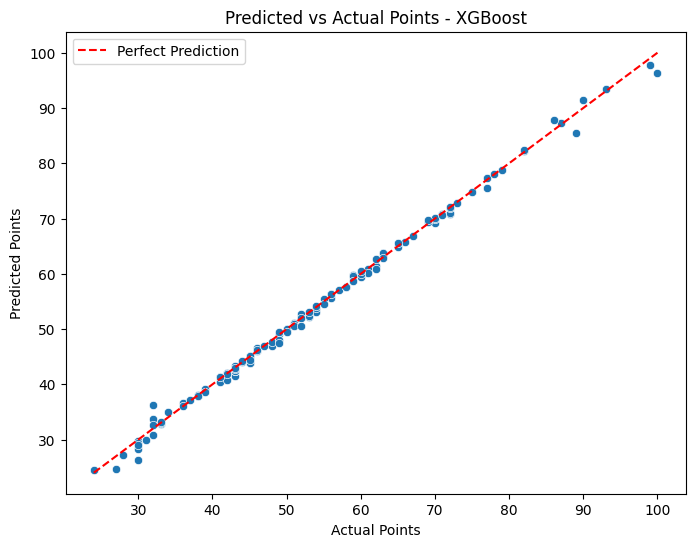

In [ ]:
# 7.1 Predicted vs Actual
y_pred = best_model.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title(f'Predicted vs Actual Points - {best_model_name}')
plt.legend()
plt.show()

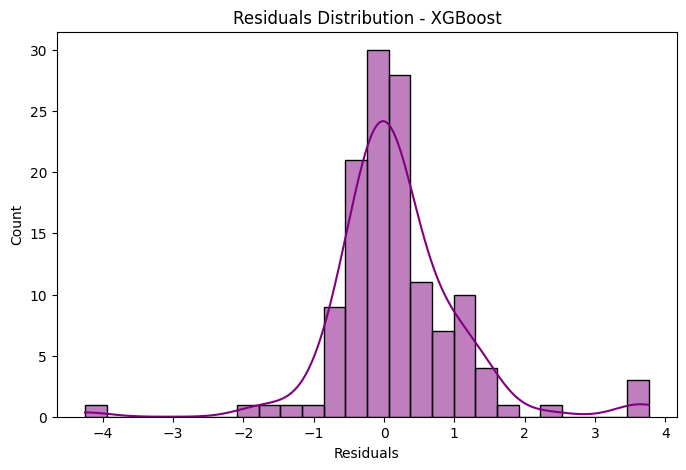

In [ ]:
# 7.2 Residuals Histogram
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title(f'Residuals Distribution - {best_model_name}')
plt.show()

/tmp/ipython-input-191713771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=vals, palette='rocket')


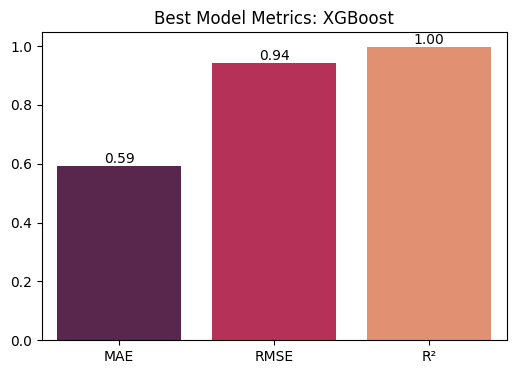

In [ ]:
# 7.4 Error Metrics Bar
metrics = ['MAE', 'RMSE', 'R²']
vals = [results[best_model_name]['mae'], results[best_model_name]['rmse'], results[best_model_name]['r2']]
plt.figure(figsize=(6,4))
sns.barplot(x=metrics, y=vals, palette='rocket')
plt.title(f'Best Model Metrics: {best_model_name}')
for i, v in enumerate(vals):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()